In [2]:
# Import libraries and dependencies
!pip install yfinance
!pip install hvplot
!pip install python-dotenv
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import yfinance as yf

import numpy as np
import hvplot.pandas
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')

Output hidden; open in https://colab.research.google.com to view.

In [3]:
def fetch_yahoo(ticker, years):
    
    range = 365*years
    today = pd.Timestamp.today(tz="America/New_York")

    start = today + pd.Timedelta(days=-1-range)
    start= start.strftime('%Y-%m-%d')
    print(f'Start date = {start}')

    end = today + pd.Timedelta(days=-2)
    end = end.strftime('%Y-%m-%d')
    print(f'End date = {end}')   

    # Get Data
    yfObj = yf.Ticker(ticker)
    stock_df = yfObj.history(start=start, end=end)
    # Drop unused columns
    stock_df.drop(['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'], inplace=True, axis=1)
    stock_df.reset_index(inplace=True)
    stock_df.rename(columns={'Date':'ds', 'Close':'y'}, inplace=True)
    return stock_df

In [7]:
# Create hlc DataFrame for Microsoft
ticker='MSFT'

# Get current closing prices for MSFT
msft_df = fetch_yahoo(ticker, 2)

# Display sample data
display(msft_df.head())
display(msft_df.tail())
print(msft_df.shape)


# Plot the DataFrame with hvplot
msft_df["y"].hvplot()

Start date = 2020-05-31
End date = 2022-05-30


,ds,y
0,2020-06-01,179.610107
1,2020-06-02,181.653473
2,2020-06-03,182.095535
3,2020-06-04,179.698517
4,2020-06-05,183.903122


,ds,y
499,2022-05-23,260.649994
500,2022-05-24,259.619995
501,2022-05-25,262.519989
502,2022-05-26,265.899994
503,2022-05-27,273.239990


(504, 2)


:Curve   [index]   (y)

In [9]:
# Call the Prophet function, store as an object
from fbprophet import Prophet
import json
from fbprophet.serialize import model_to_json, model_from_json
model_msft = Prophet()
model_msft

In [10]:
# Fit the model
model_msft.fit(msft_df)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [18]:
# Forecast two week of future trends data for Canada 
future_msft = model_msft.make_future_dataframe(periods=14, freq="D")

# Display the last five rows of the DataFrame
future_msft.tail()

,ds
513,2022-06-06
514,2022-06-07
515,2022-06-08
516,2022-06-09
517,2022-06-10


In [19]:
# Make predictions for MSFT 
forecast_msft = model_msft.predict(future_msft)

# Display the first five rows of the forecast_canada DataFrame
forecast_msft.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-06-01,188.892165,179.193783,203.143388,188.892165,188.892165,1.989234,1.989234,1.989234,1.989234,1.989234,1.989234,0.0,0.0,0.0,190.881399
1,2020-06-02,189.090228,178.828766,202.496723,189.090228,189.090228,1.728837,1.728837,1.728837,1.728837,1.728837,1.728837,0.0,0.0,0.0,190.819065
2,2020-06-03,189.288291,179.528390,202.968116,189.288291,189.288291,2.357736,2.357736,2.357736,2.357736,2.357736,2.357736,0.0,0.0,0.0,191.646027
3,2020-06-04,189.486354,180.160987,202.470837,189.486354,189.486354,1.817164,1.817164,1.817164,1.817164,1.817164,1.817164,0.0,0.0,0.0,191.303518
4,2020-06-05,189.684416,180.712244,202.996634,189.684416,189.684416,1.872897,1.872897,1.872897,1.872897,1.872897,1.872897,0.0,0.0,0.0,191.557313


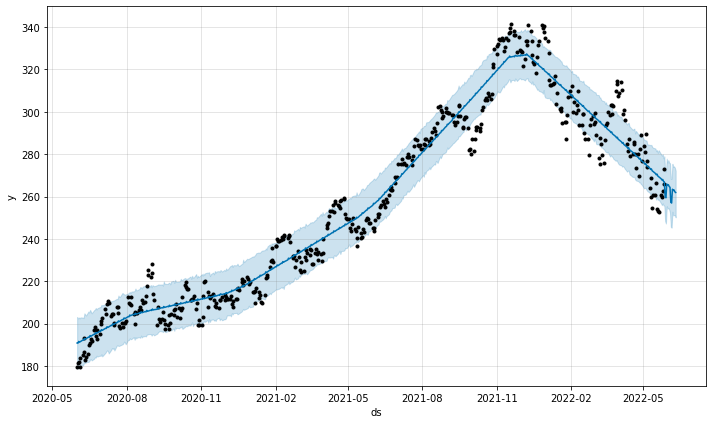

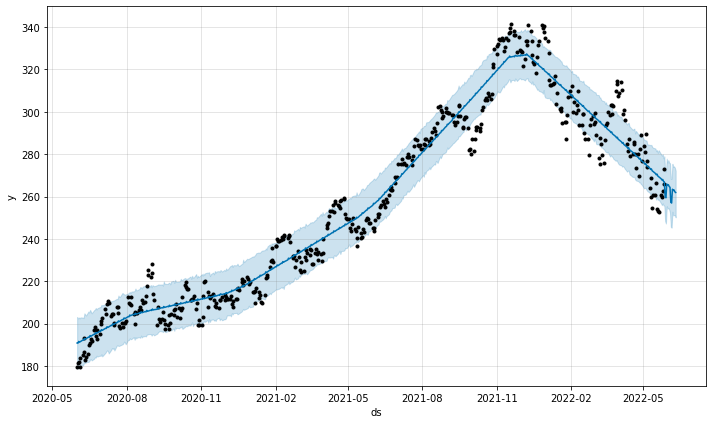

In [20]:
# Plot the forecast
model_msft.plot(forecast_msft)

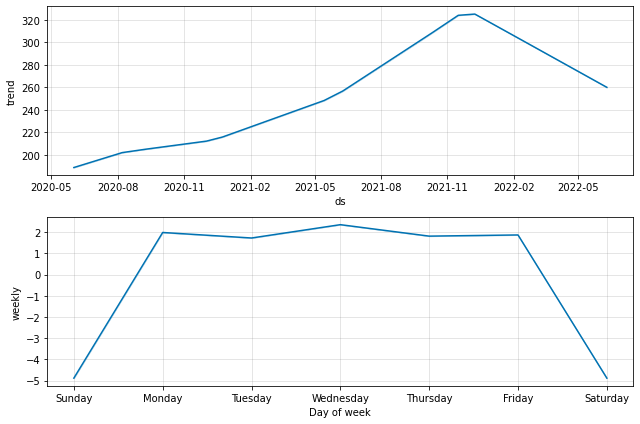

In [21]:
# Plot the different patterns
fig_msft = model_msft.plot_components(forecast_msft)

In [22]:
# Analyze the forecast results specifially for the two week period
forecast_msft = forecast_msft.set_index('ds')
forecast_msft.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
2020-06-01,188.892165,179.193783,203.143388,188.892165,188.892165,1.989234,1.989234,1.989234,1.989234,1.989234,1.989234,0.0,0.0,0.0,190.881399
2020-06-02,189.090228,178.828766,202.496723,189.090228,189.090228,1.728837,1.728837,1.728837,1.728837,1.728837,1.728837,0.0,0.0,0.0,190.819065
2020-06-03,189.288291,179.528390,202.968116,189.288291,189.288291,2.357736,2.357736,2.357736,2.357736,2.357736,2.357736,0.0,0.0,0.0,191.646027
2020-06-04,189.486354,180.160987,202.470837,189.486354,189.486354,1.817164,1.817164,1.817164,1.817164,1.817164,1.817164,0.0,0.0,0.0,191.303518
2020-06-05,189.684416,180.712244,202.996634,189.684416,189.684416,1.872897,1.872897,1.872897,1.872897,1.872897,1.872897,0.0,0.0,0.0,191.557313


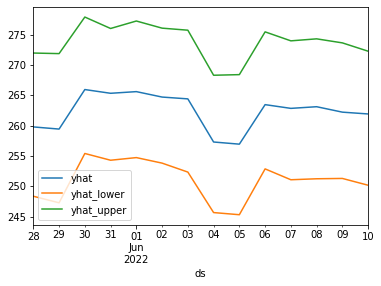

In [23]:
# Plot the results
forecast_msft[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-14:,:].plot()